# Aprendizaje No Supervisado

In [1]:
# Modulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MOdelos de aprendizaje no Supervisado
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics

# Datos
df = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/refs/heads/master/CustomerData_MarketSegmentationInsuranceUnsupervised.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [2]:
# Valores faltantes
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [4]:
# Estrategia : Eliminar los valores faltantes
df1 = df.dropna()
df1 = df1.drop(["CUST_ID"], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


In [8]:
# Escalemos los datos para luego reducir la dimensionalidad
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)
pd.DataFrame(scaled_features, columns = df1.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,0.000000e+00,1.000058,-0.764144,-0.693469,-0.326598,0.240507,8.323708
BALANCE_FREQUENCY,8636.0,-3.422716e-16,1.000058,-4.309583,0.067679,0.505405,0.505405,0.505405
PURCHASES,8636.0,1.151876e-17,1.000058,-0.473208,-0.453195,-0.299970,0.055629,22.157141
ONEOFF_PURCHASES,8636.0,-3.291073e-17,1.000058,-0.359160,-0.359160,-0.332444,-0.003445,23.842835
INSTALLMENTS_PURCHASES,8636.0,-2.797412e-17,1.000058,-0.458839,-0.458839,-0.355496,0.069019,24.072555
CASH_ADVANCE,8636.0,-4.278395e-17,1.000058,-0.468655,-0.468655,-0.468655,0.065152,21.751881
PURCHASES_FREQUENCY,8636.0,6.582147e-18,1.000058,-1.236139,-1.028455,0.009969,1.048393,1.256077
ONEOFF_PURCHASES_FREQUENCY,8636.0,-3.291073e-18,1.000058,-0.686280,-0.686280,-0.408536,0.424696,2.646651
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,8.227683e-18,1.000058,-0.926522,-0.926522,-0.507834,0.957570,1.585600
CASH_ADVANCE_FREQUENCY,8636.0,2.468305e-17,1.000058,-0.681953,-0.681953,-0.681953,0.557022,6.751896


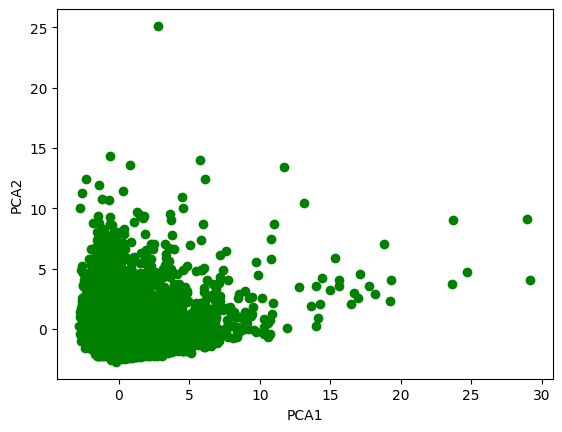

In [10]:
# Algoritmo : PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data = principal_components, columns = ["PCA1", "PCA2"])
plt.scatter(pca_df.PCA1, pca_df.PCA2, color = "green")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

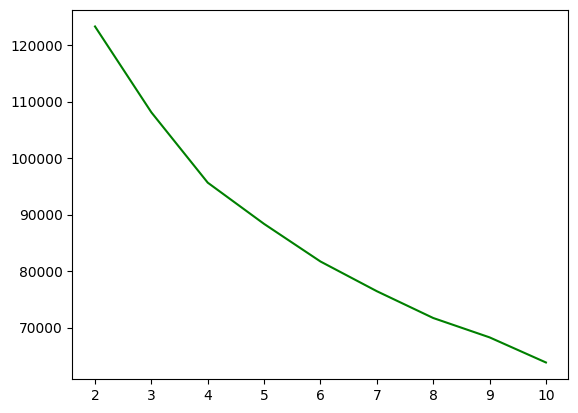

In [13]:
# Encotremos el "mejor" valor para K en la clase KMeans
inertia = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init = "random", n_init = 10, max_iter = 500)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

plt.plot(range(2,11), inertia, color = "green")
plt.show()

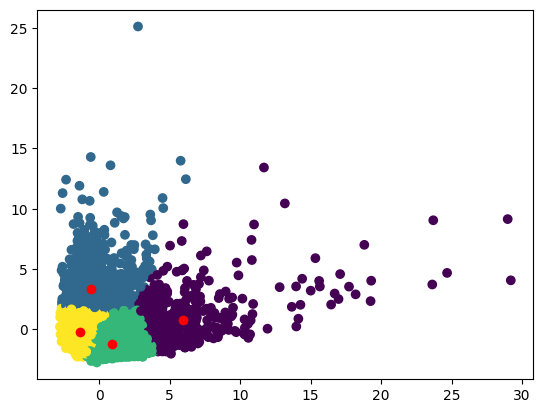

In [16]:
# Si concluimos de la tecnica del codo que el numero correcto de cluster es 4
kmeans_model_base = KMeans(n_clusters=4, init = "random", n_init = 10, max_iter = 500).fit(pca_df)
centroides = kmeans_model_base.cluster_centers_

# Visualicemos los datos y los centroides
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c = kmeans_model_base.labels_.astype("float"))
plt.scatter(centroides[:,0], centroides[:,1], c = "r")
plt.show()


In [18]:
final_df = df1.copy()
final_df["Cluster"] = kmeans_model_base.labels_
final_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,3
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


<Axes: xlabel='Cluster', ylabel='count'>

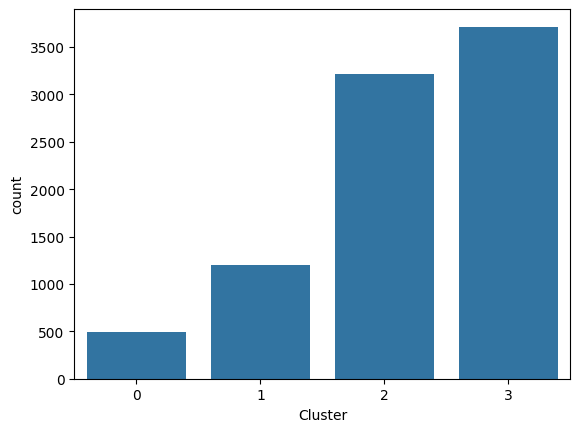

In [19]:
# Diagrama de barras para la columna Cluster
sns.countplot(x = "Cluster", data = final_df)